# Data wrangling WeRateDogs

In [3]:
#import libraries
import pandas as pd
import numpy as np
import tweepy
import requests
import json
import time
from timeit import default_timer as timer
from tweepy import OAuthHandler
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline

## Gathering data

In [3]:
#Import enhanced twitter archive CSV file that was given
archive_df = pd.read_csv('twitter-archive-enhanced.csv')

In [4]:
#Download tweet image predictions file from hosted on Udacity's servers
r = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
with open('image_predictions.tsv', 'wb') as file:
    file.write(r.content)

#Import the image predictions TSV file that is downloaded
image_df = pd.read_csv('image_predictions.tsv', sep='\t')

In [7]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = '..'
consumer_secret = '..'
access_token = '..'
access_secret = '..'

In [8]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

In [9]:
api = tweepy.API(auth)

In [11]:
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = archive_df['tweet_id']
len(tweet_ids)

2356

In [12]:
err = []
data = []
start = timer()

# This loop will add tweet json to data list likely take 20-30 minutes to run because of Twitter's rate limit
for tweet_id in tweet_ids:
    try:
        tweet = api.get_status(tweet_id, tweet_mode='extended',
                               wait_on_rate_limit = True,
                               wait_on_rate_limit_notify = True)._json 
        fav = tweet['favorite_count'] 
        ret = tweet['retweet_count'] 
        data.append({'tweet_id': int(tweet_id),
                        'favorites': int(fav),
                        'retweets': int(ret)})
    except tweepy.TweepError as e:
        print(str(tweet_id)+ " _ " + str(e))
        err.append(tweet_id)
        pass
end = timer()
print(end - start)

888202515573088257 _ [{'code': 144, 'message': 'No status found with that ID.'}]
873697596434513921 _ [{'code': 144, 'message': 'No status found with that ID.'}]
872668790621863937 _ [{'code': 144, 'message': 'No status found with that ID.'}]
869988702071779329 _ [{'code': 144, 'message': 'No status found with that ID.'}]
866816280283807744 _ [{'code': 144, 'message': 'No status found with that ID.'}]
861769973181624320 _ [{'code': 144, 'message': 'No status found with that ID.'}]
845459076796616705 _ [{'code': 144, 'message': 'No status found with that ID.'}]
842892208864923648 _ [{'code': 144, 'message': 'No status found with that ID.'}]
837012587749474308 _ [{'code': 144, 'message': 'No status found with that ID.'}]
827228250799742977 _ [{'code': 144, 'message': 'No status found with that ID.'}]
812747805718642688 _ [{'code': 144, 'message': 'No status found with that ID.'}]
802247111496568832 _ [{'code': 144, 'message': 'No status found with that ID.'}]
775096608509886464 _ [{'code

In [16]:
# Create df from the dictionaries
json = pd.DataFrame(data, columns = ['tweet_id', 'favorites', 'retweets'])

# Save each tweet's returned JSON as a new line in a .txt file
json.to_csv('tweet_json.txt', encoding = 'utf-8', index=False)

In [20]:
# Read the tweet_json.txt file into a df
tweet_df = pd.read_csv('tweet_json.txt', encoding = 'utf-8')
tweet_df.head(5)

,tweet_id,favorites,retweets
0,892420643555336193,37957,8291
1,892177421306343426,32594,6123
2,891815181378084864,24538,4054
3,891689557279858688,41293,8430
4,891327558926688256,39483,9130


## Assessing data

In [76]:
archive_df.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1043,743835915802583040,NaN,NaN,2016-06-17 16:01:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Extremely intelligent dog here....,6.671383e+17,4.196984e+09,2015-11-19 00:32:12 +0000,https://twitter.com/dog_rates/status/667138269...,10,10,None,None,None,None,None
1516,690959652130045952,NaN,NaN,2016-01-23 18:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This golden is happy to refute the soft mouth ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/690959652...,11,10,None,None,None,None,None
1055,742385895052087300,NaN,NaN,2016-06-13 15:59:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phil. That's his comfort stick. He hol...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/742385895...,11,10,Phil,None,None,None,None
2308,666817836334096384,NaN,NaN,2015-11-18 03:18:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jeph. He is a German Boston Shuttlecoc...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666817836...,9,10,Jeph,None,None,None,None
131,867051520902168576,NaN,NaN,2017-05-23 16:16:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Oh my this spooked me up. We only rate dogs, n...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/867051520...,13,10,None,None,None,None,None


In [87]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [21]:
archive_df.name.value_counts()

None         745
a             55
Charlie       12
Oliver        11
Cooper        11
Lucy          11
Lola          10
Tucker        10
Penny         10
Bo             9
Winston        9
Sadie          8
the            8
Toby           7
Bailey         7
Buddy          7
Daisy          7
an             7
Jack           6
Leo            6
Dave           6
Koda           6
Stanley        6
Rusty          6
Jax            6
Scout          6
Milo           6
Oscar          6
Bella          6
Phil           5
            ... 
Bruno          1
Autumn         1
Arlo           1
Beckham        1
Lassie         1
Ralph          1
Florence       1
Rooney         1
Sage           1
Jaycob         1
Jay            1
Rufio          1
DonDon         1
Charleson      1
Creg           1
William        1
Pilot          1
Shooter        1
Tebow          1
Taz            1
Chevy          1
Akumi          1
Bertson        1
Ambrose        1
Corey          1
Hanz           1
Tiger          1
Lolo          

In [22]:
archive_df.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [23]:
archive_df.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [24]:
archive_df.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [25]:
archive_df.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [27]:
image_df.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [81]:
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [82]:
image_df.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [84]:
sum(image_df['jpg_url'].duplicated())

66

In [28]:
tweet_df.head(5)

,tweet_id,favorites,retweets
0,892420643555336193,37957,8291
1,892177421306343426,32594,6123
2,891815181378084864,24538,4054
3,891689557279858688,41293,8430
4,891327558926688256,39483,9130


In [29]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 3 columns):
tweet_id     2340 non-null int64
favorites    2340 non-null int64
retweets     2340 non-null int64
dtypes: int64(3)
memory usage: 54.9 KB


In [30]:
tweet_df.retweets.value_counts()

57       5
599      5
322      4
1096     4
84       4
496      4
620      4
236      4
47       4
941      4
381      4
5408     4
58       4
128      4
484      4
556      4
243      4
781      4
2217     4
1005     3
450      3
480      3
3074     3
404      3
1061     3
378      3
1200     3
2537     3
598      3
975      3
        ..
5657     1
293      1
5887     1
297      1
43308    1
301      1
2350     1
305      1
253      1
18680    1
2294     1
2290     1
2244     1
8389     1
201      1
205      1
209      1
217      1
219      1
2268     1
26089    1
223      1
227      1
2276     1
2278     1
6376     1
2284     1
237      1
239      1
0        1
Name: retweets, Length: 1697, dtype: int64

In [31]:
tweet_df.describe()

,tweet_id,favorites,retweets
count,2.340000e+03,2340.000000,2340.000000
mean,7.422176e+17,7943.621795,2919.261538
std,6.832564e+16,12304.681408,4918.234202
min,6.660209e+17,0.000000,0.000000
25%,6.783394e+17,1370.500000,584.750000
50%,7.186224e+17,3454.500000,1362.000000
75%,7.986954e+17,9719.500000,3399.750000
max,8.924206e+17,163901.000000,83356.000000


### Quality
Retweeted_status_timestamp and timestamp need to be converted to year - month - day hh:mm:ss (datetime) instead of object (string).

Names of dogs has miss labelled or don’t write like names (e.g. a, an, the, by, my).

In 'name' and dog stages we have Missing values showing as 'None'.

Some columns have difficult to read and some columns that won't be used for analysis.

Contains retweets they are not original tweets (duplicates).

Delete a columns that not be use for analysis.

Text column have shortened URL to the tweet.

In Image_df we have 66 jpg_url duplicated.

### Tidiness
In archive_df table dog stages have values as columns(doggo, floofer, pupper and puppo) it should be merged into one column named "dog_stage"

The image and tweet dataframe shoud be Join to archive dataframe.

## Cleaning data

In [258]:
# Copies the dataframes to clean 
archive_df_clean = archive_df.copy()
image_df_clean = image_df.copy()
tweet_df_clean = tweet_df.copy()

##### Define

Retweeted_status_timestamp and timestamp need to be converted to year - month - day hh:mm:ss (datetime) instead of object (string).

##### Code

In [259]:
archive_df_clean['timestamp'] = pd.to_datetime(archive_df_clean.timestamp)
archive_df_clean['retweeted_status_timestamp'] = pd.to_datetime(archive_df_clean.retweeted_status_timestamp)

##### Test

In [260]:
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null datetime64[ns]
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime

##### Define

dog stages have values as columns(doggo, floofer, pupper and puppo) it should be merged into one column named "stage"

##### Code

In [261]:
# Create dog_stage variable to merge the doggo, floofer, pupper and puppo columns
archive_df_clean['dog_stage'] = archive_df_clean[['doggo', 'floofer', 'pupper', 'puppo']].max(axis=1)

In [262]:
# Drop the 4 columns
archive_df_clean = archive_df_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

##### Test

In [263]:
archive_df_clean.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891087950...,13,10,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaT,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/890729181...,13,10,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo


##### Define

Names of dogs has miss labelled or don’t write like names (e.g. a, an, the, by, my).

##### Code

In [264]:
# Find all names that start with a lowercase letter and replace with None
archive_df_clean['name'][archive_df_clean['name'].str.match('[a-z]+')] = 'None'

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


##### Test

In [265]:
archive_df_clean.name.value_counts()

None         854
Charlie       12
Oliver        11
Lucy          11
Cooper        11
Lola          10
Penny         10
Tucker        10
Bo             9
Winston        9
Sadie          8
Toby           7
Daisy          7
Buddy          7
Bailey         7
Leo            6
Scout          6
Dave           6
Jack           6
Oscar          6
Stanley        6
Rusty          6
Bella          6
Milo           6
Jax            6
Koda           6
George         5
Finn           5
Alfie          5
Sunny          5
            ... 
Autumn         1
Arlo           1
Beckham        1
Lassie         1
Amélie         1
Duchess        1
Florence       1
Jaycob         1
Tebow          1
Jay            1
Rufio          1
DonDon         1
Charleson      1
Creg           1
William        1
Pilot          1
Shooter        1
Sage           1
Chevy          1
Rooney         1
Akumi          1
Bertson        1
Ambrose        1
Corey          1
Hanz           1
Tiger          1
Lolo           1
Bruiser       

##### Define

Contains retweets they are not original tweets (duplicates) and delete a columns that not be use for analysis. Drop all columns that relate to it that in archive_df.

##### Code 

In [266]:
archive_df_clean =  archive_df_clean.drop(['source',
                                            'in_reply_to_status_id',
                                            'in_reply_to_user_id',
                                             'retweeted_status_id',
                                             'retweeted_status_user_id', 
                                             'retweeted_status_timestamp', 
                                              'expanded_urls'], 1)

##### Test

In [267]:
list(archive_df_clean)

['tweet_id',
 'timestamp',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'dog_stage']

##### Define

Change 'name' and 'dog_stage' from 'None' to NaN.

##### Code

In [268]:
archive_df_clean['name'] = archive_df_clean['name'].replace('None', np.NaN)
archive_df_clean['dog_stage'] = archive_df_clean['dog_stage'].replace('None', np.NaN)

##### Test

In [269]:
archive_df_clean.head(5)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN


##### Define

Delete a columns that not be use for analysis in image_df.

##### Code

In [270]:
image_df_clean = image_df_clean.drop(['img_num', 'p1', 
                                      'p1_conf', 'p1_dog', 
                                      'p2', 'p2_conf', 
                                      'p2_dog', 'p3', 
                                      'p3_conf', 
                                      'p3_dog'], 1)

##### Test

In [271]:
list(image_df_clean)

['tweet_id', 'jpg_url']

##### Define

In Image_df we have 66 jpg_url duplicated.

##### Code

In [272]:
image_df_clean = image_df_clean.drop_duplicates(subset=['jpg_url'], keep='last')

##### Test

In [273]:
sum(image_df_clean['jpg_url'].duplicated())

0

##### Define

The image and tweet dataframe shoud be Join to archive dataframe.

##### Code

In [274]:
archive_df_clean = pd.merge(left=archive_df_clean, right=tweet_df_clean,
                            left_on='tweet_id', right_on='tweet_id', how='inner')
archive_df_clean = archive_df_clean.merge(image_df_clean, how = 'inner', on = 'tweet_id')

##### Test

In [275]:
archive_df_clean.head(1)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,favorites,retweets,jpg_url
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,37957,8291,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg


## Storing, Analyzing, and Visualizing Data

In [ ]:
# Save archive dataframe to a CSV file
archive_df_clean.to_csv('twitter_archive_master.csv')

In [5]:
df = pd.read_csv('twitter_archive_master.csv')

#### Insight one with visualization

Text(0.5,1,'Favorite vs. Retweet Count')

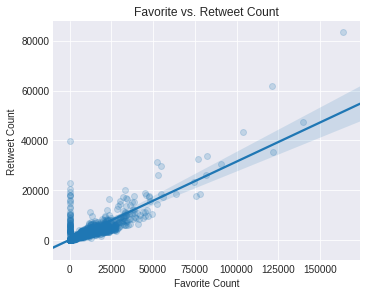

In [325]:
sns.lmplot(x = "favorites", y = "retweets", data = df, size = 4, aspect= 1.3, scatter_kws = {'alpha':1/5})
plt.xlabel('Favorite Count')
plt.ylabel('Retweet Count')
plt.title('Favorite vs. Retweet Count')

In [322]:
df.loc[df['favorites'] == 0]

,Unnamed: 0,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,favorites,retweets,jpg_url
31,31,885311592912609280,2017-07-13 01:35:06,RT @dog_rates: This is Lilly. She just paralle...,13,10,Lilly,NaN,0,18105,https://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg
66,66,877611172832227328,2017-06-21 19:36:23,RT @rachel2195: @dog_rates the boyfriend and h...,14,10,NaN,pupper,0,79,https://pbs.twimg.com/media/DCszHgmW0AAmIpT.jpg
106,106,867072653475098625,2017-05-23 17:40:04,RT @rachaeleasler: these @dog_rates hats are 1...,13,10,NaN,NaN,0,121,https://pbs.twimg.com/media/DAElHfmUMAEH9lB.jpg
129,129,860924035999428608,2017-05-06 18:27:40,RT @tallylott: h*ckin adorable promposal. 13/1...,13,10,NaN,NaN,0,830,https://pbs.twimg.com/media/C_KVJjDXsAEUCWn.jpg
166,166,851953902622658560,2017-04-12 00:23:33,RT @dog_rates: This is Astrid. She's a guide d...,13,10,Astrid,doggo,0,10025,https://pbs.twimg.com/media/C4KHj-nWQAA3poV.jpg
167,167,851861385021730816,2017-04-11 18:15:55,RT @eddie_coe98: Thanks @dog_rates completed m...,10,10,NaN,NaN,0,23,https://pbs.twimg.com/media/C8W6sY_W0AEmttW.jpg
182,182,847971574464610304,2017-04-01 00:39:12,RT @basic_vacek_: I love my new mug easy 13/10...,13,10,NaN,NaN,0,448,https://pbs.twimg.com/media/C8SZH1EWAAAIRRF.jpg
210,210,841833993020538882,2017-03-15 02:10:39,RT @dog_rates: This is Ken. His cheeks are mag...,13,10,Ken,NaN,0,16279,https://pbs.twimg.com/ext_tw_video_thumb/81742...
221,221,839290600511926273,2017-03-08 01:44:07,RT @alexmartindawg: THE DRINK IS DR. PUPPER 10...,10,10,NaN,pupper,0,152,https://pbs.twimg.com/media/C6XBt9XXEAEEW9U.jpg
224,224,838916489579200512,2017-03-07 00:57:32,RT @KibaDva: I collected all the good dogs!! 1...,15,10,NaN,NaN,0,36,https://pbs.twimg.com/media/C6RkiQZUsAAM4R4.jpg


In [323]:
df.loc[df['retweets'] == 0]

,Unnamed: 0,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,favorites,retweets,jpg_url


Retweet is  correlated with favorites. We have few of tweet do not have favorites and have few retweet.

#### Insight two with visualization

In [288]:
df_dog_stage_count = df.groupby('dog_stage').count()
df_dog_stage_count

,Unnamed: 0,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,favorites,retweets,jpg_url
dog_stage,,,,,,,,,,
doggo,63,63,63,63,63,63,36,63,63,63
floofer,8,8,8,8,8,8,5,8,8,8
pupper,216,216,216,216,216,216,121,216,216,216
puppo,23,23,23,23,23,23,15,23,23,23


In [305]:
df_dog_stage_mean = df.groupby('dog_stage').mean()
df_dog_stage_sorted = df_dog_stage_mean['rating_numerator'].sort_values()
df_dog_stage_sorted

dog_stage
pupper     10.745370
floofer    11.875000
doggo      11.888889
puppo      12.043478
Name: rating_numerator, dtype: float64

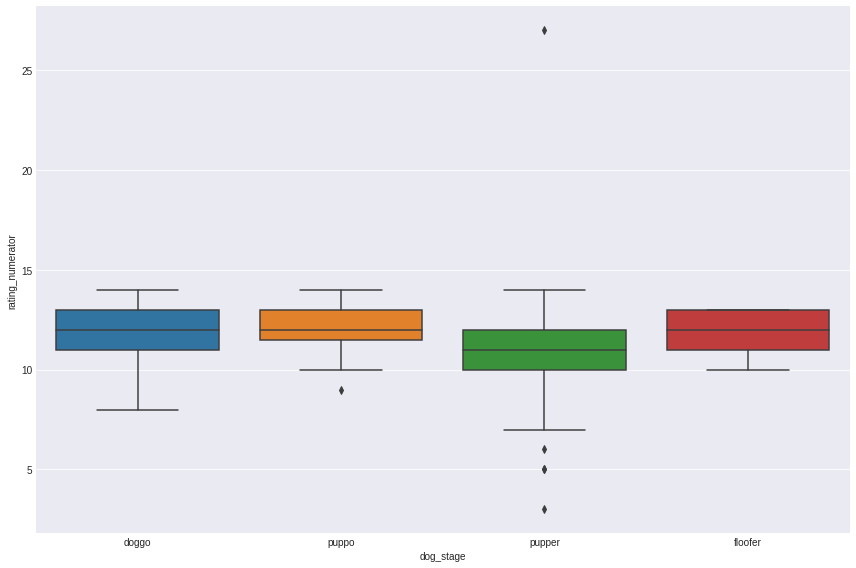

In [329]:
sns.factorplot(kind='box', y='rating_numerator', x='dog_stage', data=df[df['dog_stage'] != 'None'], size=8, aspect=1.5, legend_out=False)

Pupper: is the most owned dog and lowest mean rating.

floofer:  is the less owned dog.

puppo: highest mean rating.

#### Insight three with visualization

In [6]:
df.name.value_counts()

Lucy        10
Oliver      10
Cooper      10
Charlie     10
Tucker       9
Penny        9
Sadie        8
Winston      8
Lola         7
Daisy        7
Toby         7
Stanley      6
Bella        6
Jax          6
Koda         6
Bo           6
Milo         5
Bailey       5
Chester      5
Scout        5
Louis        5
Leo          5
Buddy        5
Oscar        5
Dave         5
Rusty        5
Clark        4
Maggie       4
Phil         4
Gary         4
            ..
Gòrdón       1
Logan        1
Bodie        1
Stefan       1
Tino         1
Kollin       1
Mosby        1
Ivar         1
Ricky        1
Furzey       1
Ron          1
Jomathan     1
Keet         1
Harnold      1
Baloo        1
Marq         1
Ike          1
Shawwn       1
Strider      1
Boston       1
Grizz        1
Pete         1
Nugget       1
Wiggles      1
Wesley       1
Dietrich     1
Kulet        1
Sky          1
Noah         1
Fizz         1
Name: name, Length: 911, dtype: int64

Text(0.5,0,'Number the Dogs')

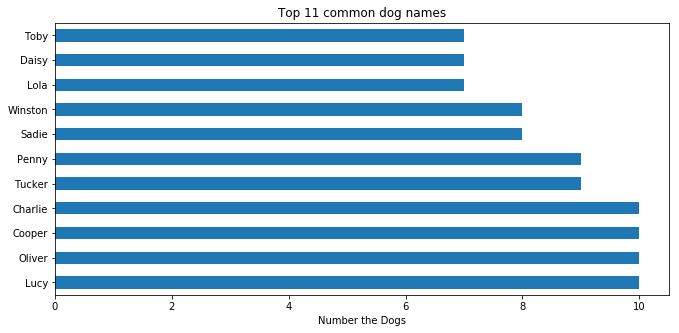

In [7]:
df.name.value_counts()[0:11].plot('barh', figsize=(11,5), title='Top 11 common dog names').set_xlabel("Number the Dogs")

We have four of names has top common names (Charlie, Oliver, Cooper, Lucy).